In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# data = pd.read_csv('result.tsv', sep='\t', error_bad_lines=False, dtype=str)
# data = data[data['Uri'].apply(lambda x: 'startswith' in dir(x) and x.startswith('https://zakupki.kontur.ru/'))]
# data = data.drop('id.1', axis=1)
# data.to_csv('result.cropped.tsv', sep='\t', encoding='utf8', index=False)

In [37]:
data = pd.read_csv('result.cropped.csv', sep='\t', dtype=str)

In [38]:
data.head()

,id,Title,Uri,PublicationDateTimeUTC,LawCode,LawDisplayName,ProcedureDisplayName,Amount,RubPrice,CurrencyCode,Nds,StatusDisplayName,StatusCode,SuppliersCount,IsWinner
0,0100600000117000001,"Закупки товаров, работ, услуг в соответствии с...",https://zakupki.kontur.ru/0100600000117000001,2017-04-13,1,44-ФЗ,Закупка у единственного поставщика (подрядчика...,1310000,NaN,RUB,NaN,Размещение завершено,2.0,NaN,NaN
1,0100600000117000002,"Закупки товаров, работ, услуг в соответствии с...",https://zakupki.kontur.ru/0100600000117000002,2017-04-13,1,44-ФЗ,Закупка у единственного поставщика (подрядчика...,249000,NaN,RUB,NaN,Размещение завершено,2.0,NaN,NaN
2,0100600000117000003,"Закупки товаров, работ, услуг в соответствии с...",https://zakupki.kontur.ru/0100600000117000003,2017-07-06,1,44-ФЗ,Закупка у единственного поставщика (подрядчика...,250000,NaN,RUB,NaN,Размещение завершено,2.0,NaN,NaN
3,0100600000117000004,Выполнение работ по ремонту автомобильной доро...,https://zakupki.kontur.ru/0100600000117000004,2017-07-06,1,44-ФЗ,Запрос котировок,400300,NaN,RUB,NaN,Размещение завершено,2.0,2.0,1.0
4,0100600000117000005,Приобретение и установка спортивного оборудования,https://zakupki.kontur.ru/0100600000117000005,2017-07-10,1,44-ФЗ,Запрос котировок,451000,NaN,RUB,NaN,Размещение завершено,2.0,1.0,0.0


In [39]:
data = data.head(500000)

In [40]:
data['StatusDisplayName'].unique()

array(['Размещение завершено', 'Размещение отменено', 'Этап подачи заявок'], dtype=object)

In [41]:
data['SuppliersCount'].fillna(0, inplace=True)
data['IsWinner'].fillna(0, inplace=True)
data.Title.fillna("", inplace=True)
data = data.drop(['Nds', 'LawCode', 'LawDisplayName'], axis=1)

In [42]:
data.head()

,id,Title,Uri,PublicationDateTimeUTC,ProcedureDisplayName,Amount,RubPrice,CurrencyCode,StatusDisplayName,StatusCode,SuppliersCount,IsWinner
0,0100600000117000001,"Закупки товаров, работ, услуг в соответствии с...",https://zakupki.kontur.ru/0100600000117000001,2017-04-13,Закупка у единственного поставщика (подрядчика...,1310000,NaN,RUB,Размещение завершено,2.0,0,0
1,0100600000117000002,"Закупки товаров, работ, услуг в соответствии с...",https://zakupki.kontur.ru/0100600000117000002,2017-04-13,Закупка у единственного поставщика (подрядчика...,249000,NaN,RUB,Размещение завершено,2.0,0,0
2,0100600000117000003,"Закупки товаров, работ, услуг в соответствии с...",https://zakupki.kontur.ru/0100600000117000003,2017-07-06,Закупка у единственного поставщика (подрядчика...,250000,NaN,RUB,Размещение завершено,2.0,0,0
3,0100600000117000004,Выполнение работ по ремонту автомобильной доро...,https://zakupki.kontur.ru/0100600000117000004,2017-07-06,Запрос котировок,400300,NaN,RUB,Размещение завершено,2.0,2.0,1.0
4,0100600000117000005,Приобретение и установка спортивного оборудования,https://zakupki.kontur.ru/0100600000117000005,2017-07-10,Запрос котировок,451000,NaN,RUB,Размещение завершено,2.0,1.0,0.0


In [43]:
data['CurrencyCode'].unique()

array(['RUB', '%', 'XDR'], dtype=object)

In [44]:
data['StatusDisplayName'].unique()

array(['Размещение завершено', 'Размещение отменено', 'Этап подачи заявок'], dtype=object)

In [45]:
data['ProcedureDisplayName'].unique(), len(data['ProcedureDisplayName'].unique())

(array(['Закупка у единственного поставщика (подрядчика, исполнителя)',
        'Запрос котировок', 'Электронный аукцион', 'Открытый конкурс',
        'Запрос предложений', 'Повторный конкурс с ограниченным участием',
        'Закрытый аукцион',
        'Способ определения поставщика (подрядчика, исполнителя), установленный Правительством Российской Федерации в соответствии со ст. 111 Федерального закона № 44-ФЗ',
        'Предварительный отбор', 'Конкурс с ограниченным участием',
        'Электронный аукцион для заключения энергосервисного контракта',
        'Повторный конкурс',
        'Конкурс для заключения энергосервисного контракта',
        'Закупка у единственного поставщика (подрядчика, исполнителя) с учетом положений ст. 111 Закона № 44-ФЗ',
        'Запрос котировок с учетом положений ст. 111 Закона № 44-ФЗ',
        'Запрос котировок на выполнение работ по строительству, реконструкции, капитальному ремонту, а также проектных, изыскательских работ в отношении олимпийских об

In [11]:
data['IsWinner'] = pd.to_numeric(data['IsWinner'])

In [12]:
f = {'IsWinner': ['sum', 'size', 'mean']}
groups = data.groupby('CurrencyCode').agg(f)
groups['IsWinner'].sort_values('mean', ascending=False)

,sum,size,mean
CurrencyCode,,,
RUB,176464.0,499997,0.35293
%,0.0,2,0.00000
XDR,0.0,1,0.00000


In [13]:
data['Amount'] = pd.to_numeric(data['Amount'].str.replace(',','.'), errors='coerce')
data['SuppliersCount'] = pd.to_numeric(data['SuppliersCount'].str.replace(',','.'), errors='coerce')

In [14]:
from currency_converter import CurrencyConverter
c = CurrencyConverter()
c.convert(100, 'USD', 'RUB')

for code in data['CurrencyCode'].unique():
    if code == '%' or 'XDR':
        continue
    data.loc[data['CurrencyCode'] == code, 'Amount'] = data.loc[data['CurrencyCode'] == code, 'Amount'].apply(lambda x: c.convert(x, code, 'RUB'))
    data.loc[data['CurrencyCode'] == code, 'CurrencyCode'] = 'RUB'

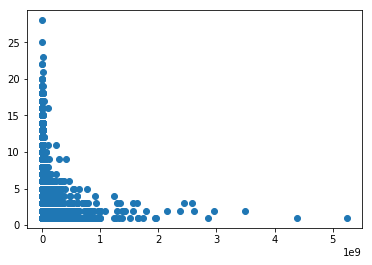

In [15]:
dna = data[~np.isnan(data['Amount']) & ~np.isnan(data['SuppliersCount'])]
plt.scatter(dna['Amount'], dna['SuppliersCount'])

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

X = dna[['Amount']]
y = dna['SuppliersCount']
score = cross_val_score(LinearRegression(), X, y, cv=3, scoring='neg_mean_squared_error').mean()
score

C:\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


-3.3084334804419631

In [17]:
from sklearn.dummy import DummyRegressor

cross_val_score(DummyRegressor(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

-3.3096202275765703

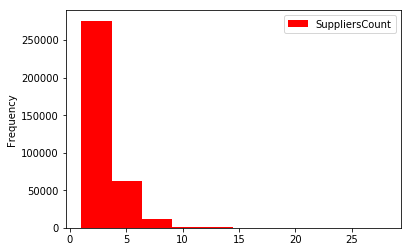

In [18]:
data.plot(y='SuppliersCount', kind='hist', color='red')

In [19]:
for i in range(20):
    print('{}: {}'.format(i, len(data[data['SuppliersCount'] == i])))

0: 0
1: 136150
2: 88884
3: 50758
4: 31033
5: 19535
6: 11328
7: 6475
8: 3499
9: 1911
10: 1035
11: 505
12: 273
13: 156
14: 67
15: 56
16: 29
17: 16
18: 11
19: 6


In [20]:
from sklearn.feature_extraction.text import HashingVectorizer

In [21]:
hashing = HashingVectorizer()

In [22]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None,
                 lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern=r'\b\w+\b',
                 ngram_range=(3, 3), analyzer='char_wb', n_features=1000, binary=True, norm=None, non_negative=False)

In [23]:
analyze = vectorizer.fit_transform(data.Title)
feats = pd.SparseDataFrame(analyze).fillna(0)
pd.DataFrame(feats).add_prefix('Ngrams_Title_')

,Ngrams_Title_0,Ngrams_Title_1,Ngrams_Title_2,Ngrams_Title_3,Ngrams_Title_4,Ngrams_Title_5,Ngrams_Title_6,Ngrams_Title_7,Ngrams_Title_8,Ngrams_Title_9,...,Ngrams_Title_990,Ngrams_Title_991,Ngrams_Title_992,Ngrams_Title_993,Ngrams_Title_994,Ngrams_Title_995,Ngrams_Title_996,Ngrams_Title_997,Ngrams_Title_998,Ngrams_Title_999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
data = pd.DataFrame(pd.concat([data.reset_index(), pd.DataFrame(feats).add_prefix('Ngrams_Title_')], axis=1)).fillna(0)

In [25]:
X = data[list(map(lambda i: 'Ngrams_Title_' + str(i), range(1000))) + ['Amount']]
y = data['SuppliersCount']
score = cross_val_score(LinearRegression(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [26]:
data

,index,id,Title,Uri,PublicationDateTimeUTC,ProcedureDisplayName,Amount,RubPrice,CurrencyCode,StatusDisplayName,...,Ngrams_Title_990,Ngrams_Title_991,Ngrams_Title_992,Ngrams_Title_993,Ngrams_Title_994,Ngrams_Title_995,Ngrams_Title_996,Ngrams_Title_997,Ngrams_Title_998,Ngrams_Title_999
0,0,0100600000117000001,"Закупки товаров, работ, услуг в соответствии с...",https://zakupki.kontur.ru/0100600000117000001,2017-04-13,Закупка у единственного поставщика (подрядчика...,1310000.00,0,RUB,Размещение завершено,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,0100600000117000002,"Закупки товаров, работ, услуг в соответствии с...",https://zakupki.kontur.ru/0100600000117000002,2017-04-13,Закупка у единственного поставщика (подрядчика...,249000.00,0,RUB,Размещение завершено,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2,0100600000117000003,"Закупки товаров, работ, услуг в соответствии с...",https://zakupki.kontur.ru/0100600000117000003,2017-07-06,Закупка у единственного поставщика (подрядчика...,250000.00,0,RUB,Размещение завершено,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3,0100600000117000004,Выполнение работ по ремонту автомобильной доро...,https://zakupki.kontur.ru/0100600000117000004,2017-07-06,Запрос котировок,400300.00,0,RUB,Размещение завершено,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,0100600000117000005,Приобретение и установка спортивного оборудования,https://zakupki.kontur.ru/0100600000117000005,2017-07-10,Запрос котировок,451000.00,0,RUB,Размещение завершено,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,5,0100600000117000006,Ремонт и благоустройство воинского захоронения...,https://zakupki.kontur.ru/0100600000117000006,2017-07-12,Электронный аукцион,825917.00,0,RUB,Размещение завершено,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,6,0100600000117000007,Ремонт автомобильной дороги в с. Копорье,https://zakupki.kontur.ru/0100600000117000007,2017-07-14,Электронный аукцион,524006.14,0,RUB,Размещение завершено,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,0100600000117000008,услуги по капитальному ремонту,https://zakupki.kontur.ru/0100600000117000008,2017-07-27,Закупка у единственного поставщика (подрядчика...,352000.00,0,RUB,Размещение отменено,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,0100600000117000009,Профилирование грунтовых дорог с подсыпкой в ...,https://zakupki.kontur.ru/0100600000117000009,2017-08-15,Электронный аукцион,1115400.00,0,RUB,Размещение завершено,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,9,0100600000117000010,Установка энергосберегающих фонарей уличного о...,https://zakupki.kontur.ru/0100600000117000010,2017-08-15,Запрос котировок,210000.00,0,RUB,Размещение завершено,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
data = data.head(500000)

In [28]:
X = data[list(map(lambda i: 'Ngrams_Title_' + str(i), range(1000))) + ['Amount']]
y = data['SuppliersCount']
score = cross_val_score(LinearRegression(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [29]:
score

-2.8370073034756675

In [30]:
cross_val_score(DummyRegressor(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

-3.6045468457005292

In [31]:
# from sklearn.svm import LinearSVR
# cross_val_score(LinearSVR(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [32]:
from sklearn.ensemble import RandomForestRegressor
data_ = data.head(50000)
X = data_[list(map(lambda i: 'Ngrams_Title_' + str(i), range(1000))) + ['Amount']]
y = data_['SuppliersCount']
cross_val_score(RandomForestRegressor(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

-3.2102002224654442

In [33]:
cross_val_score(LinearRegression(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

-3.0564514218721421

array(['Закупка у единственного поставщика (подрядчика, исполнителя)',
       'Запрос котировок', 'Электронный аукцион', 'Открытый конкурс',
       'Запрос предложений', 'Повторный конкурс с ограниченным участием',
       'Закрытый аукцион',
       'Способ определения поставщика (подрядчика, исполнителя), установленный Правительством Российской Федерации в соответствии со ст. 111 Федерального закона № 44-ФЗ',
       'Предварительный отбор', 'Конкурс с ограниченным участием',
       'Электронный аукцион для заключения энергосервисного контракта',
       'Повторный конкурс',
       'Конкурс для заключения энергосервисного контракта',
       'Закупка у единственного поставщика (подрядчика, исполнителя) с учетом положений ст. 111 Закона № 44-ФЗ',
       'Запрос котировок с учетом положений ст. 111 Закона № 44-ФЗ',
       'Запрос котировок на выполнение работ по строительству, реконструкции, капитальному ремонту, а также проектных, изыскательских работ в отношении олимпийских объектов и стр